# Day 1


## Warm up

In [ ]:
import matplotlib.pyplot as plt
import os
import sys
import pandas as pd
import numpy as np
import openpyxl

# Paths and directory
current_directory = os.getcwd()
print(current_directory)

file = os.path.join(current_directory, "01-data/covid02", "covid.xlsx")
df = pd.read_excel(file,index_col='date')

x=np.arange(0,df.loc['2020-10-01'].shape[0])
y=df.loc['2020-10-01',:].values
colormap=plt.cm.tab10(x)
plt.barh(x,y,align='center',color=colormap)
plt.xlabel('new covid cases')
plt.yticks(x,df.columns)
#plt.xticks(x,df.columns,rotation=90)



# Trading Signal coding

## Part 1— testing out Yahoo Finance package

In [11]:
import yfinance as yf
import datetime

# Define the ticker symbol
tickerSymbol = 'NFLX'
yrs= 1

# Get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

end_date = datetime.date.today()  # Today's date
start_date = end_date - datetime.timedelta(days=yrs*365) 

# Get the historical prices for this ticker
df = tickerData.history(period='1d', start=start_date, end=end_date) 

print(df)


                                 Open        High         Low       Close  \
Date                                                                        
2023-02-22 00:00:00-05:00  337.500000  341.910004  332.820007  334.880005   
2023-02-23 00:00:00-05:00  331.230011  331.279999  314.299988  323.649994   
2023-02-24 00:00:00-05:00  319.299988  321.500000  314.519989  317.149994   
2023-02-27 00:00:00-05:00  323.869995  330.000000  322.119995  323.029999   
2023-02-28 00:00:00-05:00  323.700012  327.619995  321.170013  322.130005   
...                               ...         ...         ...         ...   
2024-02-14 00:00:00-05:00  567.260010  581.250000  564.340027  579.330017   
2024-02-15 00:00:00-05:00  581.909973  593.770020  580.320007  593.460022   
2024-02-16 00:00:00-05:00  596.950012  597.000000  577.460022  583.950012   
2024-02-20 00:00:00-05:00  580.179993  586.000000  569.659973  575.130005   
2024-02-21 00:00:00-05:00  573.510010  575.780029  567.320007  573.349976   

## Part 2— Buying & Selling Singals Function

In [13]:
import matplotlib.pyplot as plt
import os
import sys
import pandas as pd
import numpy as np
import openpyxl
import warnings
warnings.filterwarnings('ignore')

#setting long and short paramaters----------------------------------------
short, long= 5 ,20

# Paths and directory-----------------------------------------------------
current_directory = os.getcwd()
print(current_directory)

df['close_short']=df['Close'].rolling(window=short).mean()
df['close_long']=df['Close'].rolling(window=long).mean()
df.index = pd.to_datetime(df.index)
df.index = df.index.strftime('%Y-%m-%d')

x5=df['close_short']
x20=df['close_long']
close=df['Close']

# Buy/Sell function-------------------------------------------------------
def buysellfx(df):
    status = 0
    pricebuy = []
    pricesell = []
    profit = []
    transdays = []
    temp_buyprice = []
    temp_buyindex = []

    for i in range(len(df) - 1):
        #buy logic
        if df['close_short'][i] > df['close_long'][i]:
            if status != 1:
                status = 1
                pricebuy.append(df['Open'][i + 1])
                pricesell.append(np.nan)
                profit.append(np.nan)
                transdays.append(np.nan)
                temp_buyprice.append(df['Open'][i + 1])
                temp_buyindex.append(i + 1)
            else:
                pricebuy.append(np.nan)
                pricesell.append(np.nan)
                profit.append(np.nan)
                transdays.append(np.nan)
        
        #sell logic
        elif df['close_short'][i] < df['close_long'][i]:
            if status != 0:
                status = 0
                pricebuy.append(np.nan)
                pricesell.append(df['Open'][i + 1])
                profit.append(df['Open'][i + 1] - temp_buyprice[-1])
                transdays.append(i + 1 - temp_buyindex[-1])
            else:
                pricebuy.append(np.nan)
                pricesell.append(np.nan)
                profit.append(np.nan)
                transdays.append(np.nan)
        else:
            pricebuy.append(np.nan)
            pricesell.append(np.nan)
            profit.append(np.nan)
            transdays.append(np.nan)

    pricebuy.append(np.nan)
    pricesell.append(np.nan)
    profit.append(np.nan)
    transdays.append(np.nan)

    return pricebuy, pricesell, profit, transdays

# Adding new columns------------------------------------------------------
df['pricebuy'], df['pricesell'], df['profit'], df['transdays'] = buysellfx(df)
# ------------------------------------------------------------------------


/Users/danramirez/MBS


## Part 3— Charting Singals

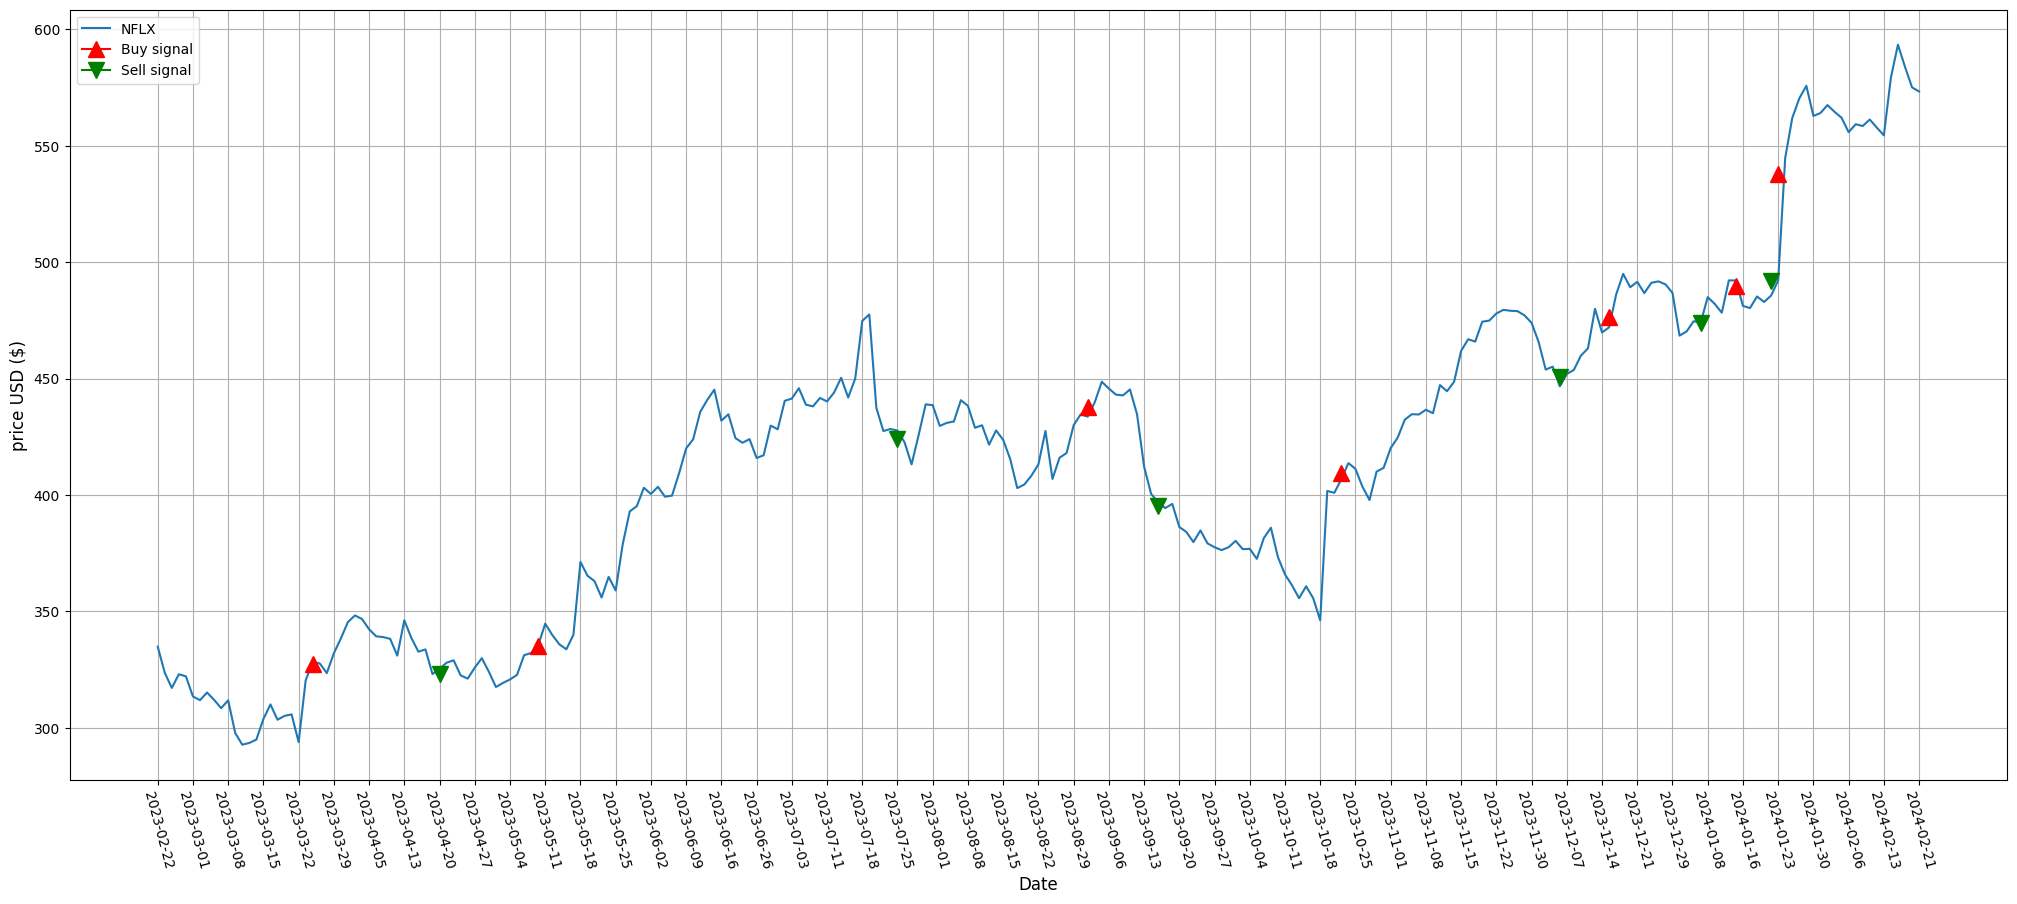

In [15]:
#charting data ------------------------------------------------------------
plt.figure(figsize=(25, 10))
plt.plot(close, label=tickerSymbol)
#plt.plot(x5, label='Close short')
#plt.plot(x20, label='Close long')

plt.plot(df.index,df['pricebuy'].values,color='red',label='Buy signal',marker='^',markersize=12)
plt.plot(df.index,df['pricesell'].values,color='green',label='Sell signal',marker='v',markersize=12)

n = 5  # Adjust n as per your data
plt.xticks(ticks=df.index[::n], labels=df.index[::n])
plt.xticks(rotation=-75)

plt.legend()
plt.xlabel('Date',fontsize=12)
plt.ylabel('price USD ($)',fontsize=12)
plt.grid()

## Part 4— Export results to Excel

In [ ]:
#export to excel-------------------------------------------------------------
df.to_excel(current_directory+'/02-output/stock.xlsx', index=True)

# Day 2

## marketing data

In [ ]:
import matplotlib.pyplot as plt
import os
import sys
import pandas as pd
import numpy as np
import openpyxl
import pandas as pd
import statsmodels.api as sm
import numpy as np  # Importing numpy
from sklearn.model_selection import train_test_split


# Paths and directory
current_directory = os.getcwd()
print(current_directory)

file = os.path.join(current_directory, "01-data/marketingdata", "Marketing.xlsx")
df = pd.read_excel(file)

print(df.info)

Y = df['Sales']
X_cols = ['TV','FB','Flyer']  # List of column names for predictor variables

# Extract columns from df to create X DataFrame
X = df[X_cols]

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(Y, X).fit()

# Get model summary
print(model.summary())

'''
Income	Limit	Rating	Cards	Age	Education	Gender	Student	Married

'''



## Credit data

In [ ]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import statsmodels.api as sm

# Paths and directory
current_directory = os.getcwd()
print(current_directory)

file = os.path.join(current_directory, "01-data/credit", "credit.xlsx")
df = pd.read_excel(file)

print(df.info())

# Define your target variable
Y = df['Balance']

# Handle categorical variables using one-hot encoding
categorical_cols = ['Gender', 'Student', 'Married', 'Education']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Convert boolean dummies to int
for column in df.columns:
    if df[column].dtype == 'bool':
        df[column] = df[column].astype(int)

print(df.info())

# Drop the target variable from the DataFrame to get the predictor variables
X = df.drop('Balance', axis=1)

# Adding a constant to the model for the intercept
X = sm.add_constant(X)

# Fit the model with the training data
model = sm.OLS(Y, X).fit()

# Print the summary of the regression model
print(model.summary())


# Day 3

## ML auto regressor

In [ ]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from numpy.random import randn


# Paths and directory
current_directory = os.getcwd()
print(current_directory)

file = os.path.join(current_directory, "01-data/ML_auto", "auto_regressor.xlsx")
df = pd.read_excel(file, usecols=['monthly_1000s'])  

s=preprocessing.MinMaxScaler()
scaled=s.fit_transform(df)
df_scaled=pd.DataFrame(scaled,columns=['norm'])

df_scaled['norm_prev01']=df_scaled['norm'].shift(1)
df_scaled['norm_prev02']=df_scaled['norm'].shift(2)
df_scaled['norm_prev03']=df_scaled['norm'].shift(3)
df_scaled['norm_target']=df_scaled['norm'].shift(-1)

df_scaled=df_scaled.dropna()
df_scaled=df_scaled.reset_index(drop=True)

df_scaled

#-----------------------------------------------

train_ratio=0.7
total_x,total_y=[],[]

for i in range(df_scaled.shape[0]):
    total_x.append(np.array(df_scaled.loc[i,['norm','norm_prev01','norm_prev02','norm_prev03']].values))
    total_y.append(df_scaled.loc[i,'norm_target'])
total_x=np.array(total_x)
total_y=np.array(total_y)

print('The number of Total_x:',total_x.shape[0])
print('The number of Total_y:',total_y.shape[0])


#-----------------------------------------------

train_x,Test_x,train_y,test_y = train_test_split(total_x,total_y,train_size= train_ratio)
print('The number of train_x:',train_x.shape[0])
print('The number of test_y:',test_y.shape[0])

def training(sample_x, sample_y, num_neuron, learning_rate = 1e-4, epoch= 5000):
    num_sample, in_dim = sample_x.shape[0], sample_x.shape[1]
    out_dim = sample_y.shape[1]
    ### --- the initial values of w1, b1, wo, bo are randomly decided by randn  ---###
    w1 = randn(in_dim, num_neuron)
    b1 = randn(1, num_neuron)
    wo = randn(num_neuron, out_dim)
    bo = randn(1, out_dim)
    for i in range(epoch):
        # sigmoid and feed_forward : 
        s = 1/(1+np.exp(-( sample_x.dot(w1) + b1 )))
        y_pred = s.dot(wo) + bo
        loss = np.square(y_pred - sample_y).sum()
        if np.mod(i, 100)==0:  
            print('training step: {}, loss={}'.format(i , loss))
        # back-propagation: 
        grad_y_pred = 2.0*(y_pred - sample_y)
        grad_wo = s.transpose().dot(grad_y_pred)
        grad_bo = grad_y_pred.sum()
        grad_s = grad_y_pred.dot(wo.transpose())
        grad_w1 = sample_x.transpose().dot(grad_s * s * (1-s))
        grad_b1 = np.sum(grad_s * s * (1-s), axis = 0)
        # update the parameters:
        w1 = w1-learning_rate * grad_w1
        wo = wo-learning_rate * grad_wo
        b1 = b1-learning_rate * grad_b1
        bo = bo-learning_rate * grad_bo
    return w1, wo, b1, bo
 

 
def forecasting(test_x, test_y, w1, wo, b1, bo):
    # based on the parameters, using feed-forward to forecast:
    s = 1/(1+np.exp(-( test_x.dot(w1) + b1)))
    y_pred = s.dot(wo) + bo
    rmse = np.square(y_pred - test_y).sum()


#-----------------------------------------------
def forecasting(test_x,test_y,w1,wo,b1,bo):
    s=1/(1+np.exp(-(test_x.dot(w1)+b1)))
    y_pred=s.dot(wo) + bo
    rmse=np.spuare(y_pred -test_y).sum()
    print( y_pred)
    print(rmse)

    
    return y_pred, rmse


### --- the parameters for the ANN: --- ###
in_dim, out_dim, num_neuron = train_x.shape[1], 1, 100
 
### --- training: --- ###
w_hid, w_out, b_hid, b_out = training(train_x, train_y, num_neuron)
 
### --- training: --- ###
prdt_norm_y, rmse = forecasting(test_x, test_y, w_hid, w_out, b_hid, b_out)
 
 

 
plt.plot(prdt_norm_y, )
plt.plot(test_y)
plt.legend(["prdt", "norm_y"], loc ="lower right")
plt.show()



# Day 4
